<a href="https://colab.research.google.com/github/dannydias04/image_processing_colab/blob/main/Lista3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lista 3 de Processamento de Imagens**

Professora: Mylene Farias

Aluna: Daniele Dias

matrícula: 20/0081691

---

In [1]:
from google.colab import drive
drive.mount('/content/drive')
import os
# Check current working directory.
print(os.getcwd())
os.chdir('/content/drive/MyDrive/processamento_imagens/Lista 03')
# Check current working directory.
print(os.getcwd())

Mounted at /content/drive
/content
/content/drive/MyDrive/processamento_imagens/Lista 03



# Global da Lista

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
from scipy import ndimage
import itertools
import math
import statistics
import imageio

################################################################################
############################## my functions  ###################################
################################################################################

################################ item 1 ########################################

#Median Filter spatial
def median_filter(image, window):
  #parameters of the filter and image
  m = window
  x, y, k = image.shape
  #Define the range of the image
  y = y - m + 1
  x = x - m + 1
  #Allocating memory
  new_image = np.zeros((x,y,k), dtype=image.dtype)
  for i in range(k):
    for j in range(x):
      for l in range(y):
        block = image[j:j+m, l:l+m,i]
        new_image[j,l,i] = statistics.median(block.ravel())
  return new_image

#Mean Filter Spatial
def mean_alpha_filter(image, window_row, window_column,d):
  #parameters of the filter and image
  m = window_row
  n = window_column
  x, y, k = image.shape
  #Define the range of the image
  y = y - n + 1
  x = x - m + 1
  #Allocating memory
  new_image = np.zeros((x,y,k), dtype=image.dtype)
  for i in range(k):
    for j in range(x):
      for l in range(y):
        block = image[j:j+m, l:l+n,i]
        list_ = block.ravel()
        order = sorted(list_)
        new_block = order[math.floor(d/2):((m*n)-math.floor(d/2))]
        new_image[j,l,i] = (1/(m*n - d))*np.sum(new_block)
  return new_image

#Maximum Filter
def max_filter(image, window_row, window_column):
  #parameters of the filter and image
  m = window_row
  n = window_column
  x, y, k = image.shape
  #Define the range of the image
  y = y - n + 1
  x = x - m + 1
  #Allocating memory
  new_image = np.zeros((x,y,k), dtype=image.dtype)
  for i in range(k):
    for j in range(x):
      for l in range(y):
        block = image[j:j+m, l:l+n,i]
        new_image[j,l,i] = block.max()
  return new_image

#Minimum Filter
def min_filter(image, window_row, window_column):
  #parameters of the filter and image
  m = window_row
  n = window_column
  x, y, k = image.shape
  #Define the range of the image
  y = y - n + 1
  x = x - m + 1
  #Allocating memory
  new_image = np.zeros((x,y,k), dtype=image.dtype)
  for i in range(k):
    for j in range(x):
      for l in range(y):
        block = image[j:j+m, l:l+n,i]
        new_image[j,l,i] = block.min()
  return new_image

#Mean point Filter
def mean_point_filter(image, window_row, window_column):
  #parameters of the filter and image
  m = window_row
  n = window_column
  x, y, k = image.shape
  #Define the range of the image
  y = y - n + 1
  x = x - m + 1
  #Allocating memory
  new_image = np.zeros((x,y,k), dtype=image.dtype)
  for i in range(k):
    for j in range(x):
      for l in range(y):
        block = image[j:j+m, l:l+n,i]
        new_image[j,l,i] = (1/2)*(block.min()+block.max())
  return new_image

#Adaptative Median Filter spatial
def adaptative_median_filter(image, window_max):
  #parameters of the filter and image
  m = window_max
  x, y, k = image.shape
  #Define the range of the image
  y = y - m + 1
  x = x - m + 1
  #Allocating memory
  new_image = np.zeros((x,y,k), dtype=image.dtype)
  for i in range(k):
    for j in range(x):
      for l in range(y):
        m = 3
        [avaliation, z_xy, z_min, z_max, z_med] = stages(i,j,l,m,image)
        #stage B
        if avaliation == True:
          B1 = z_xy - z_min
          B2 = z_xy - z_max
          if B1>0 and B2<0:
            new_image[j,l,i] = z_xy
          else:
            new_image[j,l,i] = z_med
        else:
          m = 3
          while (avaliation != True and m < window_max):
            m = m + 2
            [avaliation, z_xy, z_min, z_max, z_med] = stages(i,j,l,m,image)
          else:
            #stage B
            B1 = z_xy - z_min
            B2 = z_xy - z_max
            if B1>0 and B2<0:
              new_image[j,l,i] = z_xy
            else:
              new_image[j,l,i] = z_med
  return new_image

#First stage of adaptative median filter,stage A
def stages(i,j,l,m,image):
  block = image[j:j+m, l:l+m,i]
  z_med = statistics.median(block.ravel())
  z_min = block.min()
  z_max = block.max()
  z_xy = image[j,l,i]
  A1 = z_med - z_min
  A2 = z_med - z_max
  if A1>0 and A2<0:
    avaliation = True
  else:
    avaliation = False
  return avaliation, z_xy, z_min, z_max, z_med


################################ item 2 ########################################

#2.1

#Halftoning
def halftoning(image):
  color = {
    0: [[0, 0, 0],[0, 0, 0],[0, 0, 0]],
    1: [[0, 1, 0],[0, 0, 0],[0, 0, 0]],
    2: [[0, 1, 0],[0, 0, 0],[0, 0, 1]],
    3: [[1, 1, 0],[0, 0, 0],[0, 0, 1]],
    4: [[1, 1, 0],[0, 0, 0],[1, 0, 1]],
    5: [[1, 1, 1],[0, 0, 0],[1, 0, 1]],
    6: [[1, 1, 1],[0, 0, 1],[1, 0, 1]],
    7: [[1, 1, 1],[0, 0, 1],[1, 1, 1]],
    8: [[1, 1, 1],[1, 0, 1],[1, 1, 1]],
    9: [[1, 1, 1],[1, 1, 1],[1, 1, 1]]
    }

  image = image.astype(float)
  image = image/25.6
  image = np.floor(image)
  x,y = image.shape
  new_image = np.zeros((3*x,3*y))
  m = 3
  for i in range(x):
    for j in range(y):
      new_image[3*i:3*i+m,3*j:3*j+m]= color[image[i,j]]
  return new_image

#2.3 

# Floyd-Steinberg Method
def floyd_dithering(image):
  x, y = image.shape
  inter_image = np.zeros((x+1,y+1), dtype=image.dtype)
  new_image = np.zeros((x,y), dtype=image.dtype)
  rounding = np.zeros((x+1,y+1), dtype=image.dtype)
  inter_image[1:x+1,1:y+1] = image
  for i in range(x):
    for j in range(y):
      if inter_image[i,j]<127.5:
        rounding[i,j] = 255
      else:
        rounding[i,j] = 0
      error = inter_image[i,j] - rounding[i,j]
      #error = P[i,j] - inter_image[i,j]
      inter_image[i,j] = rounding[i,j]
      inter_image[i][j+1] = inter_image[i][j+1] + error* 7/16
      inter_image[i+1][j-1] = inter_image[i+1][j-1] + error* 3/16
      inter_image[i+1][j] = inter_image[i+1][j] + error* 5/16
      inter_image[i+1][j+1] = inter_image[i+1][j+1] + error* 1/16
  new_image = inter_image[1:x+1,1:y+1]  
  return new_image

#Stucki dithering
def stucki_dithering(image):
  x, y = image.shape
  inter_image = np.zeros((x+2,y+2), dtype=image.dtype)
  new_image = np.zeros((x,y), dtype=image.dtype)
  rounding = np.zeros((x+2,y+2), dtype=image.dtype)
  inter_image[1:x+1,1:y+1] = image
  for i in range(x):
    for j in range(y):
      if inter_image[i,j]<127.5:
        rounding[i,j] = 255
      else:
        rounding[i,j] = 0
      error = inter_image[i,j] - rounding[i,j]
      #error = P[i,j] - inter_image[i,j]
      inter_image[i,j] = rounding[i,j]
      inter_image[i][j+1] = inter_image[i][j+1] + error* 8/42
      inter_image[i][j+2] = inter_image[i][j+2] + error* 4/42
      inter_image[i+1][j-1] = inter_image[i+1][j-1] + error* 4/42
      inter_image[i+1][j-2] = inter_image[i+1][j-2] + error* 2/42
      inter_image[i+1][j] = inter_image[i+1][j] + error* 8/42
      inter_image[i+1][j+1] = inter_image[i+1][j+1] + error* 4/42
      inter_image[i+1][j+2] = inter_image[i+1][j+2] + error* 2/42
      inter_image[i+2][j-1] = inter_image[i+2][j-1] + error* 2/42
      inter_image[i+2][j-2] = inter_image[i+2][j-2] + error* 1/42
      inter_image[i+2][j] = inter_image[i+2][j] + error* 4/42
      inter_image[i+2][j+1] = inter_image[i+2][j+1] + error* 2/42
      inter_image[i+2][j+2] = inter_image[i+2][j+2] + error* 1/42
  new_image = inter_image[1:x+1,1:y+1]

  return new_image

################################ item 3 ########################################

# 3.1
#Safe RGB
def safe_RGB(image):
    r = (np.round( (image[:,:,0]/ 255.0 ) * 5 ) * 51).astype(int)
    g = (np.round( ( image[:,:,1]/ 255.0 ) * 5 ) * 51).astype(int)
    b = (np.round( ( image[:,:,2]/ 255.0 ) * 5 ) * 51).astype(int)
    image[:,:,0] = r
    image[:,:,1] = g
    image[:,:,2] = b
    return (r, g, b, image)

#3.2
def false_colors(image,inf_lim,sup_lim,*color):
  colors = {
    'y': [255,255,0],
    'c': [0,255,255],
    'm': [255,0,255],
    'r': [255,0,0],
    'g': [0,255,0],
    'b': [0,0,255]
    }
  if not color:
    color = 'y'
  else:
    color = str(color)
    color = color[2]
  lower_mask = (image[:,:,0] >= inf_lim) & (image[:,:,1] >= inf_lim) & (image[:,:,2] >= inf_lim)
  upper_mask = (image[:,:,0] < sup_lim) & (image[:,:,1] < sup_lim) & (image[:,:,2] < sup_lim)
  mask = upper_mask*lower_mask

  new_image = image.copy()
  new_image[:, :, 0] = new_image[:, :, 0] * mask
  new_image[:, :, 1] = new_image[:, :, 1] * mask
  new_image[:, :, 2] = new_image[:, :, 2] * mask
  
  new_color = colors[color]

  x,y = mask.shape
  for i in range(x):
    for j in range(y):   
      if (mask[i,j] == True):
        new_image[i,j,0] = new_color[0]
        new_image[i,j,1] = new_color[1]
        new_image[i,j,2] = new_color[2]
      else:
        new_image[i,j,0] = image[i,j,0]
        new_image[i,j,1] = image[i,j,1]
        new_image[i,j,2] = image[i,j,2]
  return new_image


(<matplotlib.axes._subplots.AxesSubplot at 0x7f425ea99bd0>,
 Text(0.5, 1.0, 'Barbara '))

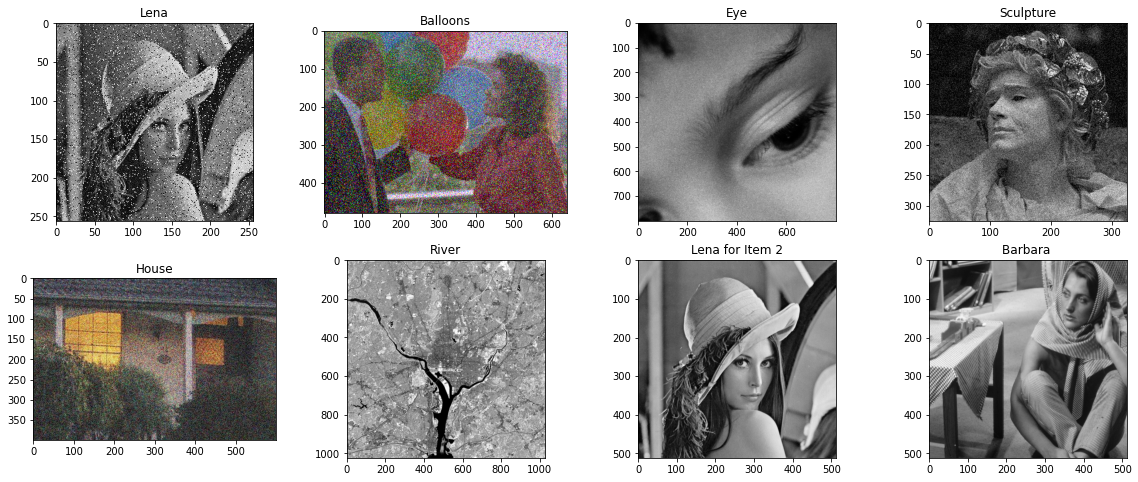

In [3]:
lena_read = cv2.imread('exemplo1.jpg')
balloons_read = cv2.imread('exemplo-2.png')
eye_read = cv2.imread('exemplo-3.jpg')
sculpture_read = cv2.imread('exemplo-4.jpg')
house_read = cv2.imread('exemplo-5.jpg')
river_read = cv2.imread('Fig0110(4).png')

lena = cv2.cvtColor(lena_read, cv2.COLOR_BGR2RGB)
balloons = cv2.cvtColor(balloons_read, cv2.COLOR_BGR2RGB)
eye = cv2.cvtColor(eye_read, cv2.COLOR_BGR2RGB)
sculpture = cv2.cvtColor(sculpture_read, cv2.COLOR_BGR2RGB)
house = cv2.cvtColor(house_read, cv2.COLOR_BGR2RGB)
river = cv2.cvtColor(river_read, cv2.COLOR_BGR2RGB)

lena_new = cv2.imread('lena.bmp',0) # pass 0 to read grayscale image
barbara = cv2.imread('barbara.png',0)

plt.figure(figsize=(20, 8), constrained_layout=False)
plt.subplot(241), plt.imshow(lena), plt.title("Lena")
plt.subplot(242), plt.imshow(balloons), plt.title("Balloons")
plt.subplot(243), plt.imshow(eye), plt.title("Eye")
plt.subplot(244), plt.imshow(sculpture), plt.title("Sculpture")
plt.subplot(245), plt.imshow(house), plt.title("House")
plt.subplot(246), plt.imshow(river), plt.title("River")
plt.subplot(247), plt.imshow(lena_new,cmap=plt.cm.gray), plt.title("Lena for Item 2")
plt.subplot(248), plt.imshow(barbara,cmap=plt.cm.gray), plt.title("Barbara ")


# Parte 1

> Filtros estatísticos são filtros espaciais de ordem, que se baseiam na classificação dos valores dos pixels.

> O filtro de mediana, realizado na função *median_filter*, substitui o valor do pixel $\hat{f}(x,y)$ pela mediana dos níveis de intensidade $g(s,t)$ na vizinhança $S_{xy}$ desse pixel:
$\hat{f}(x,y) = \underset{(s,t) \in S_{xy}}{mediana} \{g(s,t)\}$.

> Apesar do filtro de mediana ser o filtro estatístico mais utilizado, ele não é o único com o filtro de máximo, sendo útil para localizar os pontos mais claros da imagem, onde $\hat{f}(x,y) = \underset{(s,t) \in S_{xy}}{max} \{g(s,t)\}$, este filtro foi implementado em *max_filter*.

> De semelhante modo, para os pontos mais escuros da imagem, o filtro de mínimo é utilizado, onde $\hat{f}(x,y) = \underset{(s,t) \in S_{xy}}{min} \{g(s,t)\}$, este filtro foi implementado em *min_filter*.

> Tendo em vista os 2 últimos filtros, o filtro que combina ordem e a média é o filtro de ponto médio, $\hat{f}(x,y) = \frac{1}{2}\bigg[\underset{(s,t) \in S_{xy}}{max}\{g(s,t)\} + \underset{(s,t) \in S_{xy}}{min} \{g(s,t)\}\bigg]$,  implementado na função *mean_point_filter*.

> O filtro de média alfa cortada, supõe que sejam excluído da vizinhança valores de intensidade $d/2$ mais baixos e mais altos, logo se obtém um $g_r(s,t)$ representando os $mn - d$ pixels restantes, onde representamos o filtro como $\hat{f}(x,y) = \frac{1}{mn-d}\underset{(s,t) \in S_{xy}}{\sum}g_r(s,t) $. No qual $d$ pode variar de $0$ a $mn-1$. Este filtro é usado em situações que envolve múltiplos ruídos e foi implementado na função *mean_alpha_filter*.

> O último filtro implementado foi o filtro adaptativo de mediana, que busca preservar detalhes e suavizar ruído não impulsivo, algo que o mediano não faz. O algoritmo, implementado em *adaptative_median_filter*, consiste em 2 estágios. No estágio A a partir das diferenças dos valores médios com os máximos e mínimos, ele avalia se tem que ir para o estágio B ou se aumenta a janela de vizinhança, até um limite estabelecido pelo usuário. Uma vez no estágio B, se define se a saída é o valor atual no pixel ou a mediana.

>> Na função *adaptative_median_filter* deve-se informar a imagem e o tamanho da janela máxima, por exemplo se é 5x5, deve-se informar 5.

>> Na função *median_filter* deve-se informar a imagem e o tamanho da janela, por exemplo se é 5x5, deve-se informar 5.

>> Nas funções *max_filter*, *min_filter* e *mean_point_filter*, deve-se informar a imagem e os tamanhos $m \times n$ da janela, por exemplo se for 5x3, informe 5 e 3.

>> Na função *mean_alpha_filter*, deve-se informar a imagem e os tamanhos $m \times n$ da janela, por exemplo se for 5x3, informe 5 e 3 e o valor de $d$, sabendo que $d$ deve estar entre 0 e $mn -1$.

>> Para todas essas funções as imagens devem ter 3 canais.

## Example 1

In [6]:
lena_adaptative = adaptative_median_filter(lena, 5)
lena_median = median_filter(lena, 5)
lena_max = max_filter(lena, 3, 3)
lena_min = min_filter(lena, 3, 3)
lena_point = mean_point_filter(lena, 3, 3)
lena_alpha = mean_alpha_filter(lena, 3, 3, 4)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:155: RuntimeWarning: overflow encountered in ubyte_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:140: RuntimeWarning: overflow encountered in ubyte_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:106: RuntimeWarning: overflow encountered in ubyte_scalars


(<matplotlib.axes._subplots.AxesSubplot at 0x7f425eb00990>,
 Text(0.5, 1.0, 'Alpha-Trimmed Mean Filter with d = 4'))

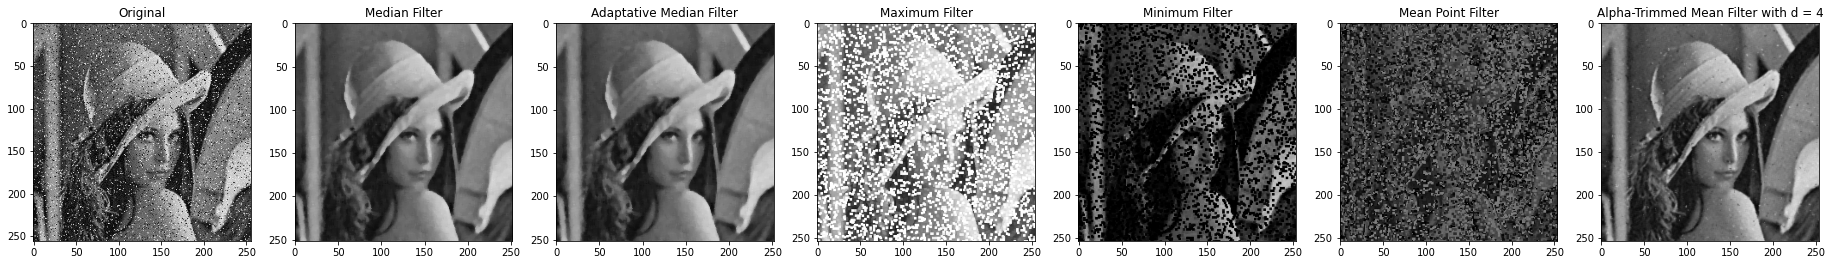

In [7]:
plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)
plt.subplot(171), plt.imshow(lena), plt.title("Original")
plt.subplot(172), plt.imshow(lena_median), plt.title("Median Filter")
plt.subplot(173), plt.imshow(lena_adaptative), plt.title("Adaptative Median Filter")
plt.subplot(174), plt.imshow(lena_max), plt.title("Maximum Filter")
plt.subplot(175), plt.imshow(lena_min), plt.title("Minimum Filter")
plt.subplot(176), plt.imshow(lena_point), plt.title("Mean Point Filter")
plt.subplot(177), plt.imshow(lena_alpha), plt.title("Alpha-Trimmed Mean Filter with d = 4")

> A imagem por ter ruído do tipo sal e pimenta, os filtros de máximo, mínimo e ponto médio não resultam em bons resultados. O filtro de mediana que apresenta melhor resultado, é o de janela $3\times3$, porém fiz com uma janela de $5\times5$ para comparar com o adaptativo, porém por não ser um ruído de alta probabilidade de ocorrência, o filtro mediano já se mostra suficiente. Já o filtro de alfa cortado, mesmo usando $d = 4$ com uma janela $3\times3$, apresenta um bom resultado retirando o ruído, com $d = 6$ o ruído é praticamente removido.

## Example 2

In [ ]:
balloons_adaptative = adaptative_median_filter(balloons, 5)
balloons_median = median_filter(balloons, 5)
balloons_max = max_filter(balloons, 5, 5)
balloons_min = min_filter(balloons, 5, 5)
balloons_point = mean_point_filter(balloons, 5, 5)
balloons_alpha = mean_alpha_filter(balloons, 5, 5, 20)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:154: RuntimeWarning: overflow encountered in ubyte_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:139: RuntimeWarning: overflow encountered in ubyte_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:105: RuntimeWarning: overflow encountered in ubyte_scalars


(<matplotlib.axes._subplots.AxesSubplot at 0x7fc804715910>,
 Text(0.5, 1.0, 'Alpha-Trimmed Mean Filter with d = 20'))

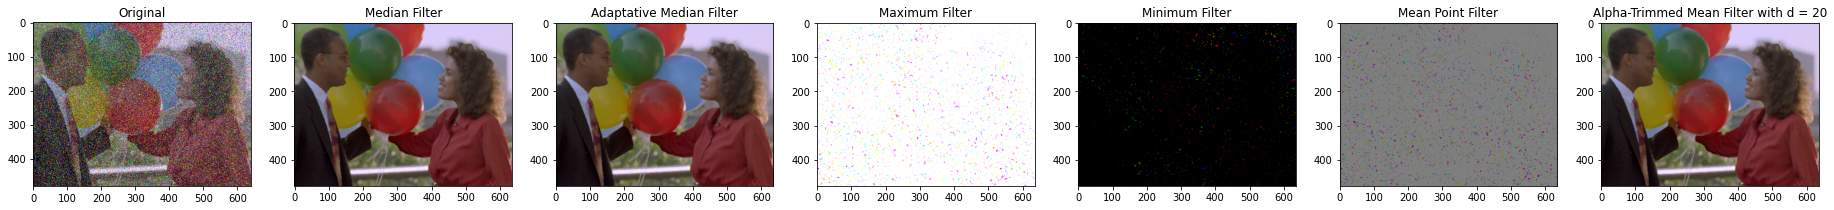

In [ ]:
plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)
plt.subplot(171), plt.imshow(balloons), plt.title("Original")
plt.subplot(172), plt.imshow(balloons_median), plt.title("Median Filter")
plt.subplot(173), plt.imshow(balloons_adaptative), plt.title("Adaptative Median Filter")
plt.subplot(174), plt.imshow(balloons_max), plt.title("Maximum Filter")
plt.subplot(175), plt.imshow(balloons_min), plt.title("Minimum Filter")
plt.subplot(176), plt.imshow(balloons_point), plt.title("Mean Point Filter")
plt.subplot(177), plt.imshow(balloons_alpha), plt.title("Alpha-Trimmed Mean Filter with d = 20")

> A imagem por ter ruído do tipo sal e pimenta, os filtros de máximo, mínimo e ponto médio não resultam em bons resultados. O filtro de mediana que apresenta melhor resultado, é o de janela $5\times5$, em  comparação ao adaptativo o melhor é o mediano novamente devido a não ocorrência de alta probabilidade. Já o filtro de alfa cortado, com $d = 20$ com uma janela $5\times5$, o ruído é praticamente removido.

## Example 3

> Para os exemplos 3, 4 e 5, o melhor filtro foi o de média alpha cortado e o pior é o de ponto médio, apesar do filtro de ponto médio só deteriorar pontos específicos das imagens e ele funcionar melhor em ruídos aleatoriamente distríbuidos, o que me leva a concluir que estas imagens possuem mais de um tipo de ruído presente, pois o alpha cortado é o melhor nessas situações.

In [ ]:
eye_adaptative = adaptative_median_filter(eye, 5)
eye_median = median_filter(eye, 5)
eye_max = max_filter(eye, 3, 3)
eye_min = min_filter(eye, 3, 3)
eye_point = mean_point_filter(eye, 3, 3)
eye_alpha = mean_alpha_filter(eye, 3, 3, 6)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:154: RuntimeWarning: overflow encountered in ubyte_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:139: RuntimeWarning: overflow encountered in ubyte_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:105: RuntimeWarning: overflow encountered in ubyte_scalars


(<matplotlib.axes._subplots.AxesSubplot at 0x7fc803c7a850>,
 Text(0.5, 1.0, 'Alpha-Trimmed Mean Filter with d = 6'))

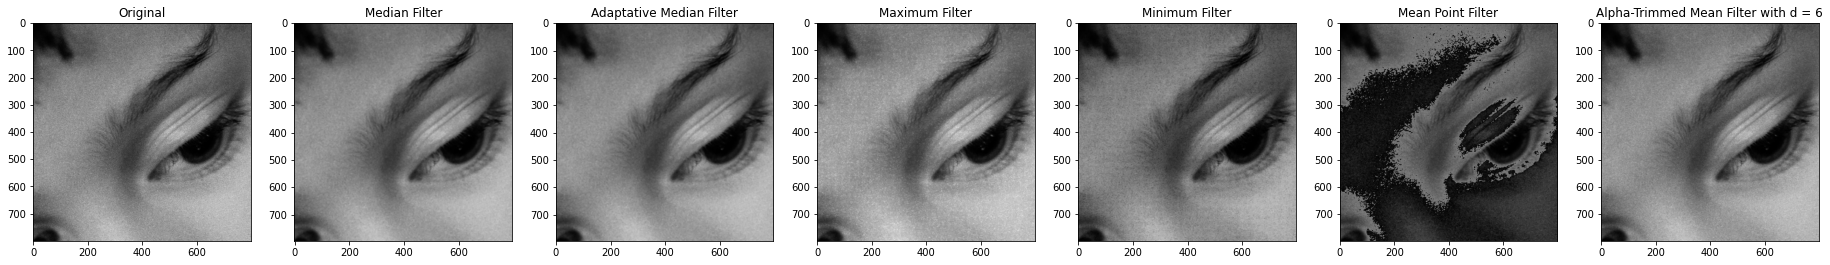

In [ ]:
plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)
plt.subplot(171), plt.imshow(eye), plt.title("Original")
plt.subplot(172), plt.imshow(eye_median), plt.title("Median Filter")
plt.subplot(173), plt.imshow(eye_adaptative), plt.title("Adaptative Median Filter")
plt.subplot(174), plt.imshow(eye_max), plt.title("Maximum Filter")
plt.subplot(175), plt.imshow(eye_min), plt.title("Minimum Filter")
plt.subplot(176), plt.imshow(eye_point), plt.title("Mean Point Filter")
plt.subplot(177), plt.imshow(eye_alpha), plt.title("Alpha-Trimmed Mean Filter with d = 6")

## Example 4

In [ ]:
sculpture_adaptative = adaptative_median_filter(sculpture, 5)
sculpture_median = median_filter(sculpture, 5)
sculpture_max = max_filter(sculpture, 3, 3)
sculpture_min = min_filter(sculpture, 3, 3)
sculpture_point = mean_point_filter(sculpture, 3, 3)
sculpture_alpha = mean_alpha_filter(sculpture, 3, 3, 6)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:154: RuntimeWarning: overflow encountered in ubyte_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:139: RuntimeWarning: overflow encountered in ubyte_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:105: RuntimeWarning: overflow encountered in ubyte_scalars


(<matplotlib.axes._subplots.AxesSubplot at 0x7fc803f26a10>,
 Text(0.5, 1.0, 'Alpha-Trimmed Mean Filter with d = 6'))

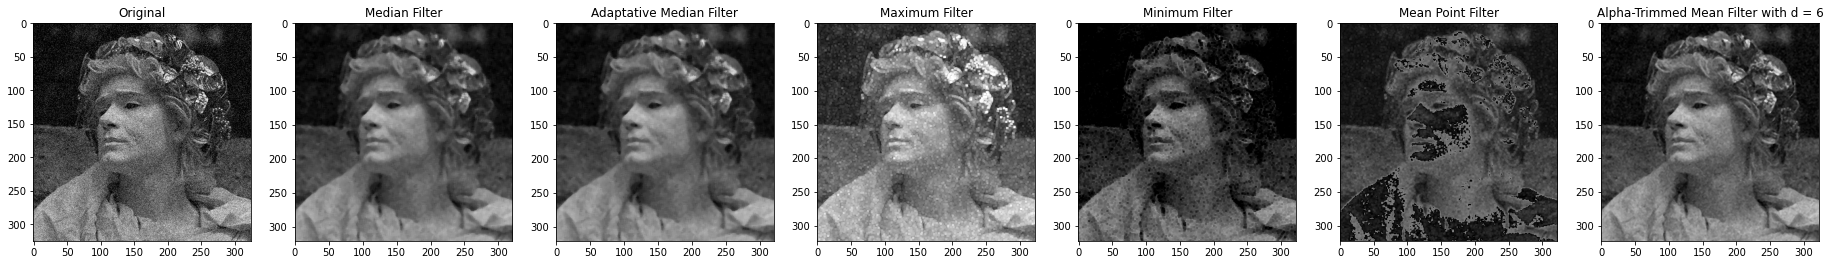

In [ ]:
plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)
plt.subplot(171), plt.imshow(sculpture), plt.title("Original")
plt.subplot(172), plt.imshow(sculpture_median), plt.title("Median Filter")
plt.subplot(173), plt.imshow(sculpture_adaptative), plt.title("Adaptative Median Filter")
plt.subplot(174), plt.imshow(sculpture_max), plt.title("Maximum Filter")
plt.subplot(175), plt.imshow(sculpture_min), plt.title("Minimum Filter")
plt.subplot(176), plt.imshow(sculpture_point), plt.title("Mean Point Filter")
plt.subplot(177), plt.imshow(sculpture_alpha), plt.title("Alpha-Trimmed Mean Filter with d = 6")

## Example 5

In [ ]:
house_adaptative = adaptative_median_filter(house, 5)
house_median = median_filter(house, 5)
house_max = max_filter(house, 3, 3)
house_min = min_filter(house, 3, 3)
house_point = mean_point_filter(house, 3, 3)
house_alpha = mean_alpha_filter(house, 3, 3, 6)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:154: RuntimeWarning: overflow encountered in ubyte_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:139: RuntimeWarning: overflow encountered in ubyte_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:105: RuntimeWarning: overflow encountered in ubyte_scalars


(<matplotlib.axes._subplots.AxesSubplot at 0x7fc8039b0310>,
 Text(0.5, 1.0, 'Alpha-Trimmed Mean Filter with d = 6'))

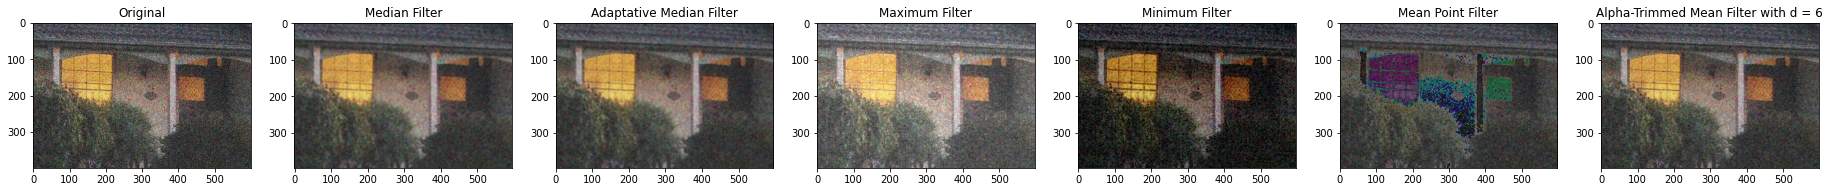

In [ ]:
plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)
plt.subplot(171), plt.imshow(house), plt.title("Original")
plt.subplot(172), plt.imshow(house_median), plt.title("Median Filter")
plt.subplot(173), plt.imshow(house_adaptative), plt.title("Adaptative Median Filter")
plt.subplot(174), plt.imshow(house_max), plt.title("Maximum Filter")
plt.subplot(175), plt.imshow(house_min), plt.title("Minimum Filter")
plt.subplot(176), plt.imshow(house_point), plt.title("Mean Point Filter")
plt.subplot(177), plt.imshow(house_alpha), plt.title("Alpha-Trimmed Mean Filter with d = 6")

# Parte 2

## Item 1

> O *Halftone* é uma técnica que simula tons contínuos em uma imagem, onde são variados a densidade e tons da imagem. 

>> A função *halftoning*  necessita somente da imagem para ser utilizada, para reduzir aos 10 níveis exigidos pelo enunciado, a imagem é dividida por 25.6 e logo após é mapeada para cada padrão de cor exigido.

>> Para todas as funções deste item, as imagens devem ter somente 1 canal.

(<matplotlib.axes._subplots.AxesSubplot at 0x7f425b832bd0>,
 Text(0.5, 1.0, 'Barbara after halftoning'))

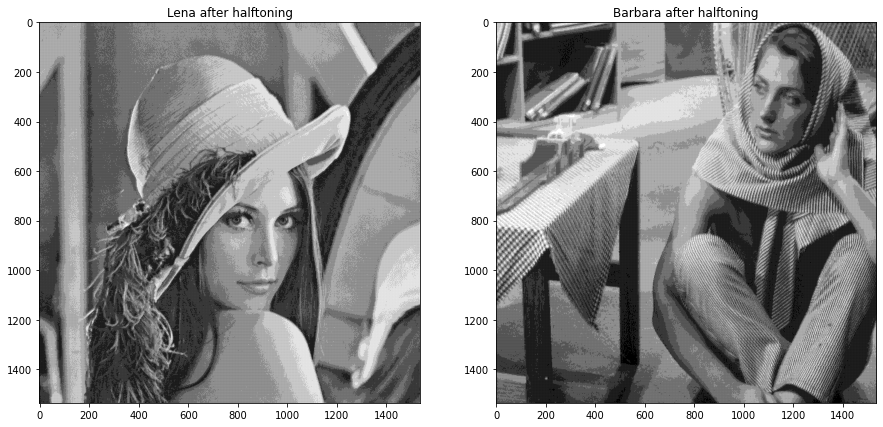

In [17]:
new_image_lena = halftoning(lena_new)
new_image_barbara = halftoning(barbara)
plt.figure(figsize=(15, 15), constrained_layout=False)
plt.subplot(121), plt.imshow(new_image_lena,cmap=plt.cm.gray), plt.title("Lena after halftoning")
plt.subplot(122), plt.imshow(new_image_barbara,cmap=plt.cm.gray), plt.title("Barbara after halftoning")

## Item 2

(<matplotlib.axes._subplots.AxesSubplot at 0x7f425bac4fd0>,
 Text(0.5, 1.0, 'Barbara Image after halftoning with Noise'))

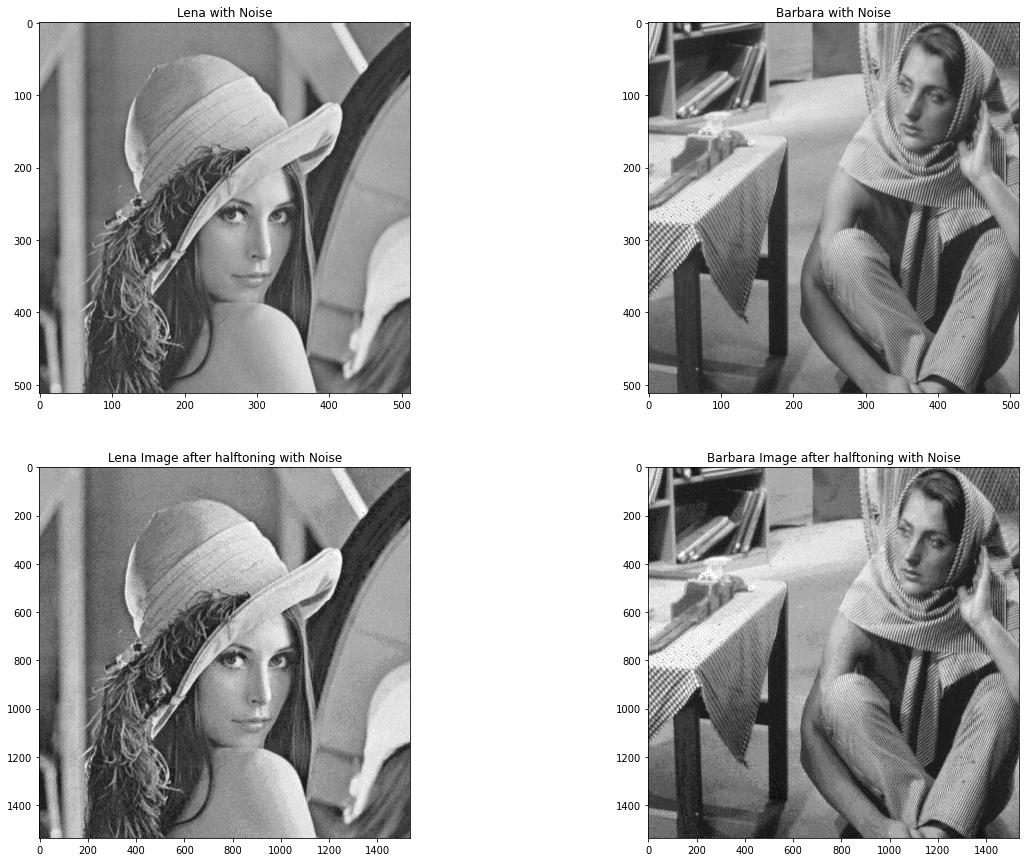

In [15]:
sigma = 10
# Adding noise in the image
noise_barbara = barbara + (np.abs(np.random.randn(*barbara.shape)) * sigma).astype(np.uint8)
noise_lena = lena_new + (np.abs(np.random.randn(*lena_new.shape)) * sigma).astype(np.uint8)


noise_halft_barbara = halftoning(noise_barbara)
noise_halft_lena = halftoning(noise_lena)

plt.figure(figsize=(20, 15), constrained_layout=False)
plt.subplot(221), plt.imshow(noise_lena,cmap=plt.cm.gray), plt.title("Lena with Noise")
plt.subplot(222), plt.imshow(noise_barbara,cmap=plt.cm.gray), plt.title("Barbara with Noise")
plt.subplot(223), plt.imshow(noise_halft_lena,cmap=plt.cm.gray), plt.title("Lena Image after halftoning with Noise")
plt.subplot(224), plt.imshow(noise_halft_barbara,cmap=plt.cm.gray), plt.title("Barbara Image after halftoning with Noise")

> Em relação ao resultado anterior, ambas as imagens com ruído não apresentam mais falsos contornos evidentes, tornando-se mais uniformes.

## Item 3

> O *dithering* é uma técnica de representação que obtém melhores resultados que o halftoning. No dithering, cada elemento de um bloco da imagem é quantizado utilizando o padrão de *dither* como limiar (*threshold*).

>> O *dithering* de Floyd-Steinberg é implementado na função *floyd_dithering* e só é necessário a imagem.

>> O *dithering* de [Stucki](https://web.archive.org/web/20120815114111/http://sekal.ics.p.lodz.pl/~andrey/html/po/doc/org/plant/kzpif/filters/dithering/Stucki.html) é implementado na função *stucki_dithering* e só é necessário a imagem. 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:205: RuntimeWarning: overflow encountered in ubyte_scalars


(<matplotlib.axes._subplots.AxesSubplot at 0x7f425cb43090>,
 Text(0.5, 1.0, 'Barbara after dithering with Floyd-Steinberg Method'))

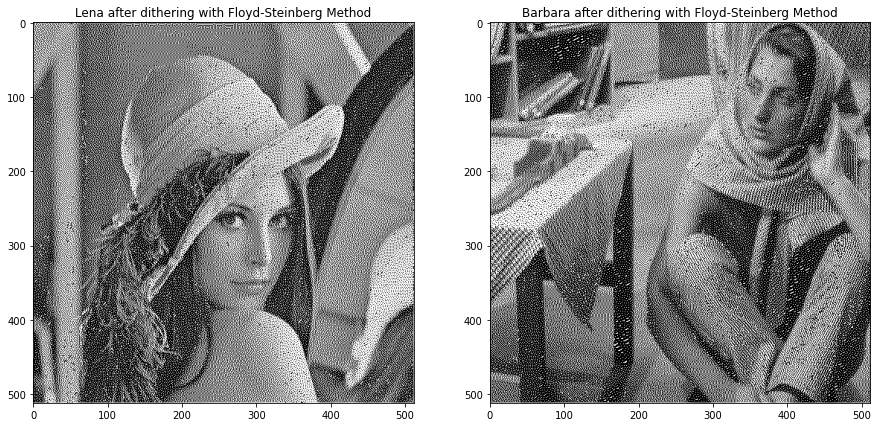

In [18]:
lena_floyd = floyd_dithering(lena_new)
barbara_floyd = floyd_dithering(barbara)

plt.figure(figsize=(15, 15), constrained_layout=False)
plt.subplot(121), plt.imshow(lena_floyd, cmap=plt.cm.gray), plt.title("Lena after dithering with Floyd-Steinberg Method")
plt.subplot(122), plt.imshow(barbara_floyd, cmap=plt.cm.gray), plt.title("Barbara after dithering with Floyd-Steinberg Method")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:229: RuntimeWarning: overflow encountered in ubyte_scalars


(<matplotlib.axes._subplots.AxesSubplot at 0x7f425b87f190>,
 Text(0.5, 1.0, 'Barbara after dithering with Stucki Method'))

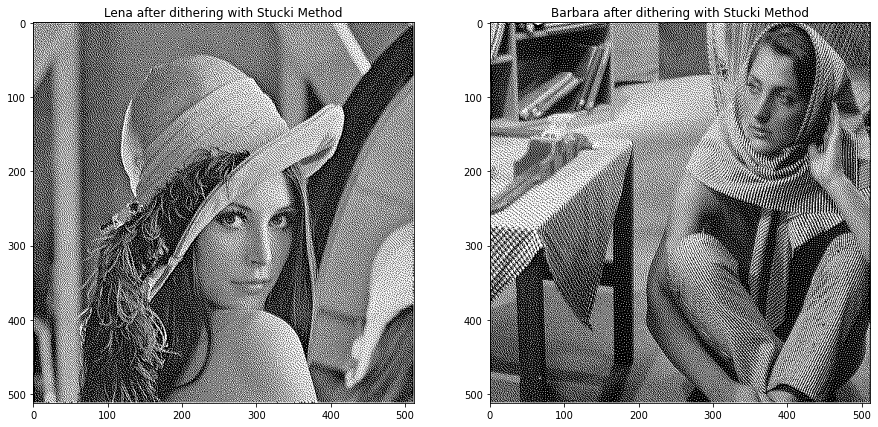

In [19]:
lena_stucki = stucki_dithering(lena_new)
barbara_stucki = stucki_dithering(barbara)

plt.figure(figsize=(15, 15), constrained_layout=False)
plt.subplot(121), plt.imshow(lena_stucki,cmap=plt.cm.gray), plt.title("Lena after dithering with Stucki Method")
plt.subplot(122), plt.imshow(barbara_stucki,cmap=plt.cm.gray), plt.title("Barbara after dithering with Stucki Method")

(<matplotlib.axes._subplots.AxesSubplot at 0x7f425b4f90d0>,
 Text(0.5, 1.0, 'Barbara after dithering with Stucki Method'))

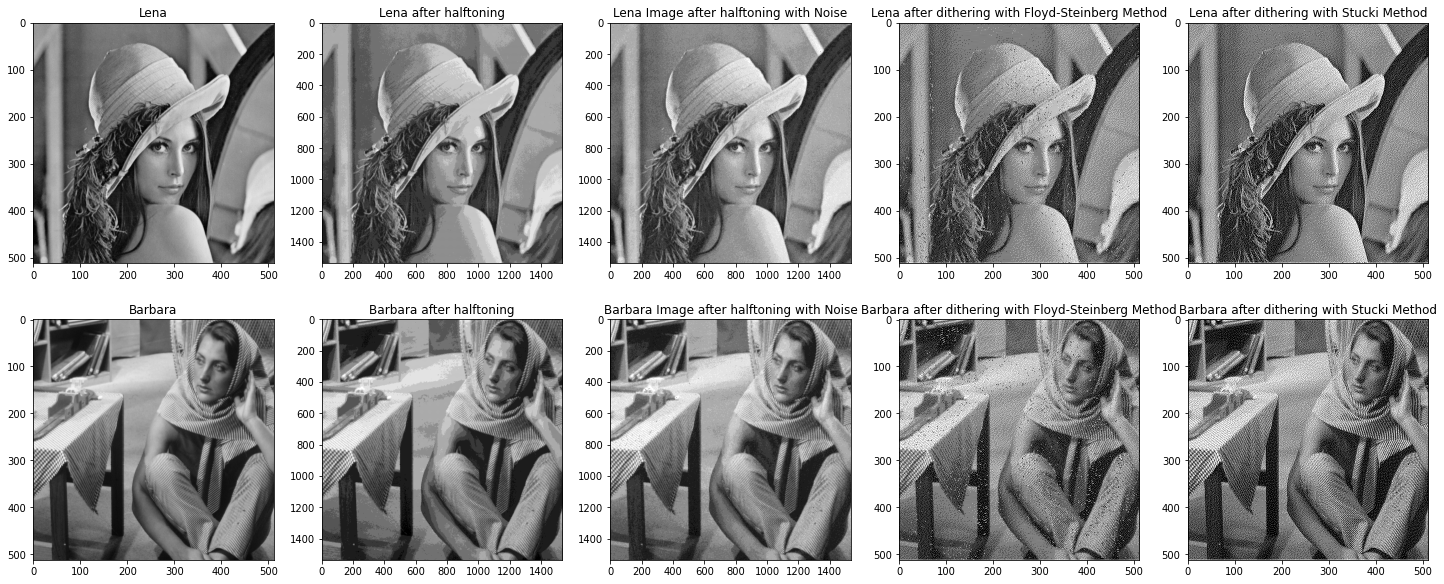

In [20]:
plt.figure(figsize=(25, 10), constrained_layout=False)
plt.subplot(251), plt.imshow(lena_new,cmap=plt.cm.gray), plt.title("Lena")
plt.subplot(252), plt.imshow(new_image_lena,cmap=plt.cm.gray), plt.title("Lena after halftoning")
plt.subplot(253), plt.imshow(noise_halft_lena,cmap=plt.cm.gray), plt.title("Lena Image after halftoning with Noise")
plt.subplot(254), plt.imshow(lena_floyd,cmap=plt.cm.gray), plt.title("Lena after dithering with Floyd-Steinberg Method")
plt.subplot(255), plt.imshow(lena_stucki,cmap=plt.cm.gray), plt.title("Lena after dithering with Stucki Method")
plt.subplot(256), plt.imshow(barbara,cmap=plt.cm.gray), plt.title("Barbara")
plt.subplot(257), plt.imshow(new_image_barbara,cmap=plt.cm.gray), plt.title("Barbara after halftoning")
plt.subplot(258), plt.imshow(noise_halft_barbara,cmap=plt.cm.gray), plt.title("Barbara Image after halftoning with Noise")
plt.subplot(259), plt.imshow(barbara_floyd,cmap=plt.cm.gray), plt.title("Barbara after dithering with Floyd-Steinberg Method")
plt.subplot(2,5,10), plt.imshow(barbara_stucki,cmap=plt.cm.gray), plt.title("Barbara after dithering with Stucki Method")

> O melhor resultado é o *dithering* de Stucki, os detalhes e tons no fundo das imagens são mais homogêneos, isso também acontesse no de Floyd-Steinberg, porém ele resultou em mais artefatos na imagem. O *halftone* após adicionar ruído também melhora os falsos contornos, porém eles ainda podem ser vistos ao fundo nas paredes.

# Parte 3

## Item 1

> O conjunto de cores RGB seguras são um subconjunto do conjunto de cores RGB de 24 bits (ou $(2^8)^3$ cores), conhecido como *full-color*. Como inúmeras aplicações não faz sentido utilizar mais do que algumas centenas de cores e muitos sistemas são limitados, o conjunto RGB de cores seguras foi criado para reproduzir com mais chances e fidelidade as cores com razoável independência de hardware.

>> Neste item as imagens devem ter 3 canais.

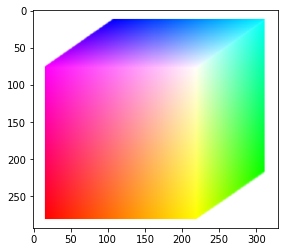

In [ ]:
image_rgb = imageio.imread('cubo_colorido.PNG')
plt.imshow(image_rgb)

>> A função *safe_RGB* foi implementada para reproduzir essas 216 cores mínimas para garantir que sejam reproduzidas com fidelidade. Ela retorna cada canal de cor e a imagem com o mapa de cores RGB segura.

(<matplotlib.axes._subplots.AxesSubplot at 0x7fa808a1db50>,
 Text(0.5, 1.0, 'RGB Safe'))

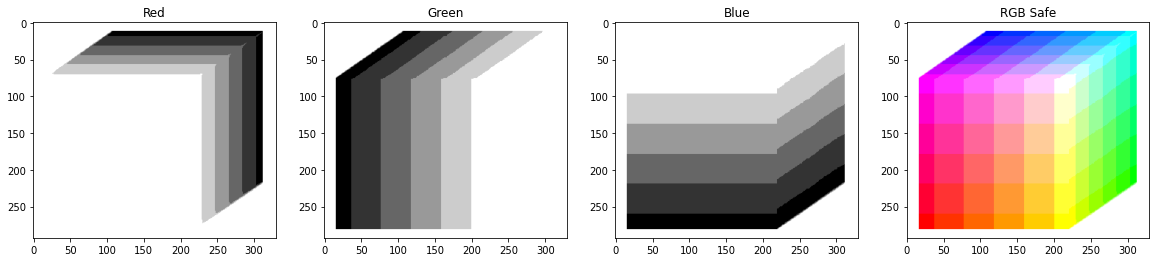

In [ ]:
[r,g,b,image_safe_rgb] = safe_RGB(image_rgb)

plt.figure(figsize=(20, 10), constrained_layout=False)
plt.subplot(141), plt.imshow(r,cmap=plt.cm.gray), plt.title("Red")
plt.subplot(142), plt.imshow(g,cmap=plt.cm.gray), plt.title("Green")
plt.subplot(143), plt.imshow(b,cmap=plt.cm.gray), plt.title("Blue")
plt.subplot(144), plt.imshow(image_safe_rgb), plt.title("RGB Safe")

## Item 2 e 3


>> A função *false_colors* possui 3 parâmetros de entrada obrigatórios, que são a imagem para alteração de cor em tons de cinza, os dois intervalos de valores de níveis de cinza que se deseja alterar a cor, sendo o mínimo e o máximo, respectivamenrte e opcionalmente a cor que se deseja para o intervalo mencionado. o intervalo pode ser de 0 a 255, senão dará erro, e as cores que podem ser selecionada são: vermelho ('r'), azul ('b'), verde ('g'), amarelo ('y'), ciano ('c') e magenta ('m'), como *default* é amarelo.

(<matplotlib.axes._subplots.AxesSubplot at 0x7fa808da4650>,
 Text(0.5, 1.0, 'Blue'))

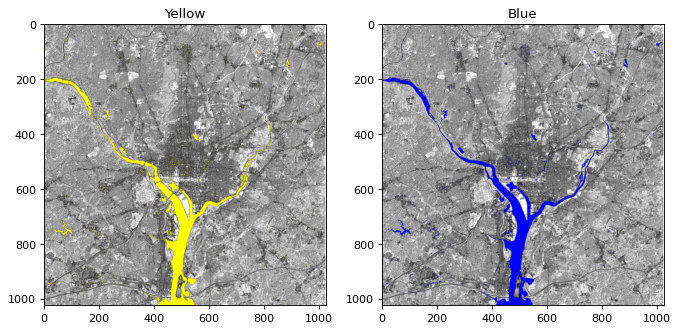

In [ ]:
river_out = false_colors(river,0,40)
river_out_blue = false_colors(river,0,40,'b')
plt.figure(num=None, figsize=(10, 15), dpi=80)
plt.subplot(121),plt.imshow(river_out),plt.title('Yellow')
plt.subplot(122),plt.imshow(river_out_blue),plt.title('Blue')